In [28]:
import xarray as xr
import numpy as np
import os
from glob import glob
import sys
from importlib import reload
import matplotlib.pyplot as plt

In [23]:
os.getcwd()

'/home/563/ab2313'

In [26]:
sys.path.append(os.path.join(os.getcwd(), 'Documents/PhD'))
import constants
sys.path.append(constants.MODULE_DIR)
import utils

In [8]:
CO21PCT_PATH = '/g/data/oi10/replicas/CMIP6/C4MIP'

In [70]:
fpahts_1pct_raw = glob(os.path.join(CO21PCT_PATH, '**/tas/**/*1pctCO2*.nc'), recursive=True)

In [71]:
fpahts_1pct_raw = np.sort(fpahts_1pct_raw)

In [72]:
[[f for f in fpahts_1pct_raw if 'CESM2' in f]]

[['/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/1pctCO2-bgc/r1i1p1f1/Amon/tas/gn/v20190724/tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
  '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/1pctCO2-bgc/r1i1p1f1/Amon/tas/gn/v20190724/tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
  '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/1pctCO2-bgc/r1i1p1f1/Amon/tas/gn/v20190724/tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc']]

In [75]:
fpahts_1pct = [f for f in fpahts_1pct_raw if '-rad' in f]

In [76]:
np.unique(list(map(os.path.dirname, fpahts_1pct)))

array(['/g/data/oi10/replicas/CMIP6/C4MIP/BCC/BCC-CSM2-MR/1pctCO2-rad/r1i1p1f1/Amon/tas/gn/v20190321',
       '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/1pctCO2-rad/r1i1p1f1/Amon/tas/gn/v20190429',
       '/g/data/oi10/replicas/CMIP6/C4MIP/CNRM-CERFACS/CNRM-ESM2-1/1pctCO2-rad/r1i1p1f2/Amon/tas/gr/v20181113',
       '/g/data/oi10/replicas/CMIP6/C4MIP/IPSL/IPSL-CM6A-LR/1pctCO2-rad/r1i1p1f1/Amon/tas/gr/v20180914',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/1pctCO2-rad/r1i1p1f2/Amon/tas/gn/v20191129',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MOHC/UKESM1-0-LL/1pctCO2-rad/r1i1p1f2/Amon/tas/gn/v20190723',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/1pctCO2-rad/r1i1p1f1/Amon/tas/gn/v20190710',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/1pctCO2-rad/r2i1p1f1/Amon/tas/gn/v20190710',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/1pctCO2-rad/r3i1p1f1/Amon/tas/gn/v20190710',
       '/g/data/oi10/replicas/CMIP6/C4MIP/MRI/MRI-

In [53]:
utils.pprint_list(fpahts_1pct, num_start_items=10, num_end_items=3)

lenght = 88
 0. /g/data/oi10/replicas/CMIP6/C4MIP/BCC/BCC-CSM2-MR/1pctCO2-bgc/r1i1p1f1/Amon/tas/gn/v20190321/tas_Amon_BCC-CSM2-MR_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc
 1. /g/data/oi10/replicas/CMIP6/C4MIP/BCC/BCC-CSM2-MR/1pctCO2-rad/r1i1p1f1/Amon/tas/gn/v20190321/tas_Amon_BCC-CSM2-MR_1pctCO2-rad_r1i1p1f1_gn_185001-200012.nc
 2. /g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/1pctCO2-bgc/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc
 3. /g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/1pctCO2-rad/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2-rad_r1i1p1f1_gn_185001-200012.nc
 4. /g/data/oi10/replicas/CMIP6/C4MIP/CNRM-CERFACS/CNRM-ESM2-1/1pctCO2-bgc/r1i1p1f2/Amon/tas/gr/v20181109/tas_Amon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gr_185001-198912.nc
 5. /g/data/oi10/replicas/CMIP6/C4MIP/CNRM-CERFACS/CNRM-ESM2-1/1pctCO2-bgc/r2i1p1f2/Amon/tas/gr/v20190711/tas_Amon_CNRM-ESM2-1_1pctCO2-bgc_r2i1p1f2_gr_185001-198912.nc
 6. /g/data/oi10/replicas/CM

In [62]:
ds1 = xr.open_dataset(fpahts_1pct[0]).tas; ds1

<xarray.DataArray 'tas' (time: 1812, lat: 160, lon: 320)>
[92774400 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean (interval: 5 minutes)
    cell_measures:  area: areacella
    history:        2019-03-21T01:38:37Z altered by CMOR: Treated scalar dime...

In [60]:
ds2 = xr.open_dataset(fpahts_1pct[1]).tas; ds2

<xarray.DataArray 'tas' (time: 1812, lat: 160, lon: 320)>
[92774400 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean (interval: 5 minutes)
    cell_measures:  area: areacella
    history:        2019-03-21T02:06:59Z altered by CMOR: Treated scalar dime...

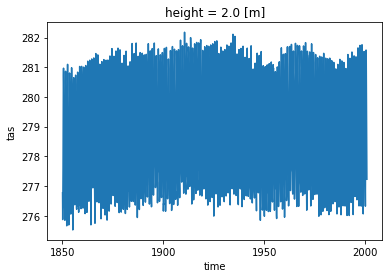

In [57]:
ds1.mean(['lat', 'lon']).plot()

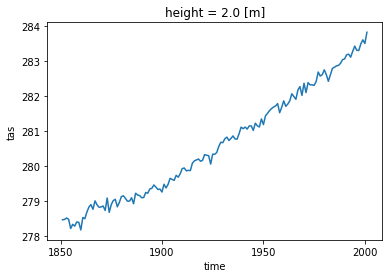

In [63]:
ds2.mean(['lat', 'lon']).resample(time='Y').mean().plot()